In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv("air-passengers.csv")

In [38]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [39]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


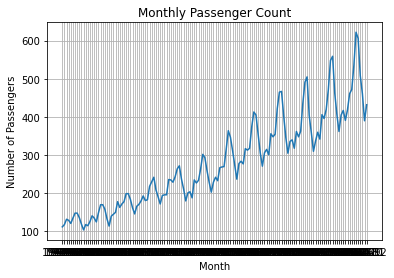

In [40]:
plt.plot(data["Month"], data["#Passengers"], label="Passenger Count")
plt.title("Monthly Passenger Count")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.grid(True)
plt.show()

In [41]:
data["Month"] =  pd.to_datetime(data["Month"])

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [43]:
from matplotlib.dates import YearLocator

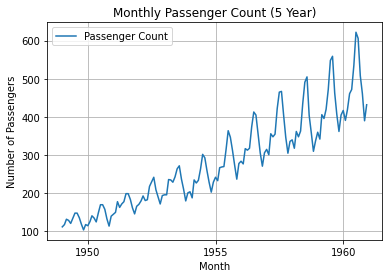

In [44]:
plt.plot(data["Month"], data["#Passengers"], label="Passenger Count")
plt.title("Monthly Passenger Count (5 Year)")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.legend()

plt.gca().xaxis.set_major_locator(YearLocator(5))

plt.grid(True)
plt.show()

In [45]:
from statsmodels.tsa.stattools import adfuller

In [46]:
time_series_data = data["#Passengers"]

In [47]:
result = adfuller(time_series_data)

In [48]:
print("ADF Statistic", result[0])
print("p-value", result[1])
print("Critical Values", result[4])

ADF Statistic 0.8153688792060482
p-value 0.991880243437641
Critical Values {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [49]:
if result[1] <= 0.05:
    print("The data is stationary")
else:
    print("The data is not stationary") 

The data is not stationary


In [50]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [51]:
model = auto_arima(time_series_data, suppress_warnings=True, seasonal=False, stepwise = True)

In [52]:
order = model.get_params()["order"]

In [53]:
arima_model = ARIMA(time_series_data, order=order)

In [54]:
arima_result = arima_model.fit()

c:\Users\alche\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\alche\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [55]:
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -674.913
Date:                Mon, 30 Sep 2024   AIC                           1365.825
Time:                        21:22:03   BIC                           1389.528
Sample:                             0   HQIC                          1375.457
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.332      -0.126       0.374
ar.L4         -0.5213      0.085     -6.136      0.000      -0.688      -0.355
ma.L1          0.9069      0.094      9.657      0.000       0.723       1.091
ma.L2         -0.5590      0.145     -3.866      0.000      -0.842      -0.276
ma.L3         -0.7385      0.109     -6.778      0.000      -0.952      -0.525
sigma2       724.1721     85.616      8.458      0.000     556.369     891.975
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                14.59
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               5.66   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

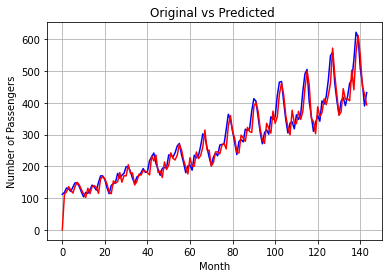

In [56]:
plt.plot(time_series_data, label="Original", color = "blue")
plt.plot(arima_result.fittedvalues, label="Predicted", color = "red")
plt.title("Original vs Predicted ")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.grid(True)
plt.show()

In [57]:
forecast_steps = 24

In [58]:
forecast_values = arima_result.get_forecast(steps=forecast_steps).predicted_mean

In [59]:
forecast_index = pd.date_range(start=time_series_data.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq="M")

TypeError: unsupported operand type(s) for +: 'int' and 'DateOffset'

In [60]:
forecast_values

144    467.573854
145    490.494660
146    509.137041
147    492.554843
148    495.305996
149    475.947800
150    476.339824
151    475.552131
152    472.353843
153    483.889708
154    475.570242
155    485.921587
156    479.133670
157    480.987475
158    482.221433
159    476.211065
160    483.942850
161    475.847399
162    482.794303
163    479.012004
164    479.518685
165    482.449494
166    476.973995
167    483.511063
Name: predicted_mean, dtype: float64

In [ ]:
plt.plot(time_series_data.index, time_series_data, label="Original", color = "blue")
plt.plot(forecast_index, forecast_values, label="Predicted", color = "red")
plt.title("Original Time Series with 24-Month Forecast")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid(True)
plt.show()